In [14]:
import h5py
import mat73
import os
import glob
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

Each .mat file is a dictionary holding five keys

In [12]:
mtfile = mat73.loadmat('../data/1.mat')['cjdata']['image']
mtfile['cjdata'].keys()

dict_keys(['PID', 'image', 'label', 'tumorBorder', 'tumorMask'])

Sample images of Axial, Coronal, and Sagittal sections.

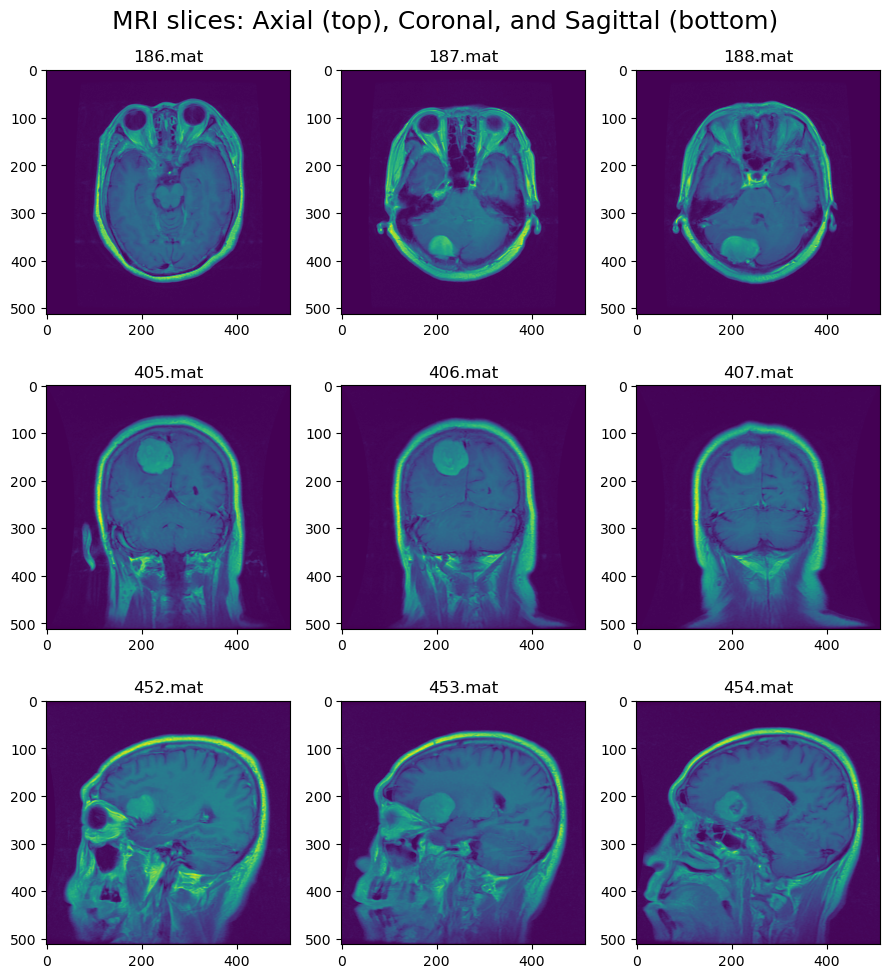

In [31]:
samples = [(186, 187, 188), (405, 406, 407), (452, 453, 454)]

fig, ax = plt.subplots(3, 3, figsize=(9,10))
for i, s in enumerate(samples):
    img1 = mat73.loadmat(f'../data/{s[0]}.mat')['cjdata']['image']
    img2 = mat73.loadmat(f'../data/{s[1]}.mat')['cjdata']['image']
    img3 = mat73.loadmat(f'../data/{s[2]}.mat')['cjdata']['image']

    ax[i, 0].imshow(img1[:])
    ax[i, 0].set_title(f'{s[0]}.mat')
    ax[i, 1].imshow(img2[:])
    ax[i, 1].set_title(f'{s[1]}.mat')
    ax[i, 2].imshow(img3[:])
    ax[i, 2].set_title(f'{s[2]}.mat')

fig.suptitle("MRI slices: Axial (top), Coronal, and Sagittal (bottom)",
    fontsize=18)
plt.tight_layout()

Convert .mat files to .jpg

In [39]:
labels = []

for filename in os.listdir('../data'):
    with h5py.File(f'../data/{filename}', 'r') as f:    
        labels.append(f['cjdata']['label'][0][0])

labels = np.array(labels, dtype=int)

In [45]:
label_counts = {'meningioma':sum(labels==1), 
                'glioma':sum(labels==2), 
                'pituitary tumor':sum(labels==3)}

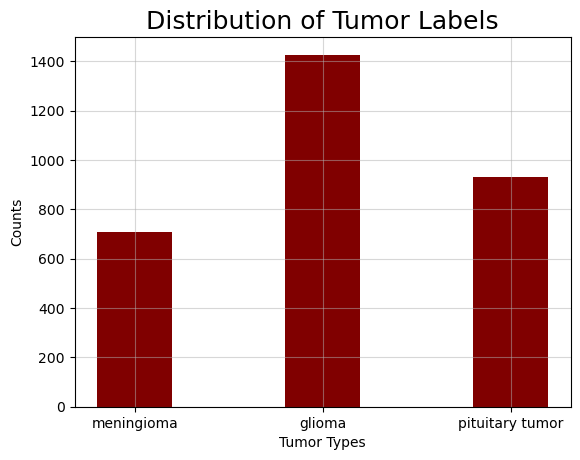

In [53]:
plt.bar(label_counts.keys(), label_counts.values(), color ='maroon',
        width = 0.4)
 
plt.xlabel("Tumor Types")
plt.ylabel("Counts")
plt.title("Distribution of Tumor Labels", fontsize=18)
plt.grid(alpha=0.5)
plt.show()

TODO: plot representation of tumor border
see 'references' folder for description of TumorBorder

In [51]:
samp_border = mat73.loadmat('../data/1.mat')
print(samp_border['cjdata']['tumorBorder'][:])


[267.61524501 231.37568058 277.83666062 248.10163339 289.91651543
 250.8892922  305.71324864 253.676951   318.72232305 249.9600726
 321.50998185 237.88021779 354.96188748 234.16333938 367.97096189
 227.65880218 380.9800363  210.93284936 372.61705989 195.13611615
 363.32486388 177.48094374 350.31578947 176.55172414 336.37749546
 183.98548094 317.79310345 196.06533575 305.71324864 207.21597096
 295.49183303 217.43738657 288.98729583 222.08348457 273.19056261
 223.94192377 268.54446461 228.58802178]
